In [2]:
import numpy as np
import time
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft


In [45]:
#Sample data
#x = np.linspace(0.0, 0.75, 600, endpoint=False)
#y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

x = np.linspace(0, 999, 1000)
y = np.sin(x) + np.random.rand(len(x))*2

time = np.arange(0, 20, 1/100)
theta = 0

sinewave = 1 * np.sin(2 * np.pi * 1 * time + theta) + np.sin(2* np.pi * 10 * time + np.pi)

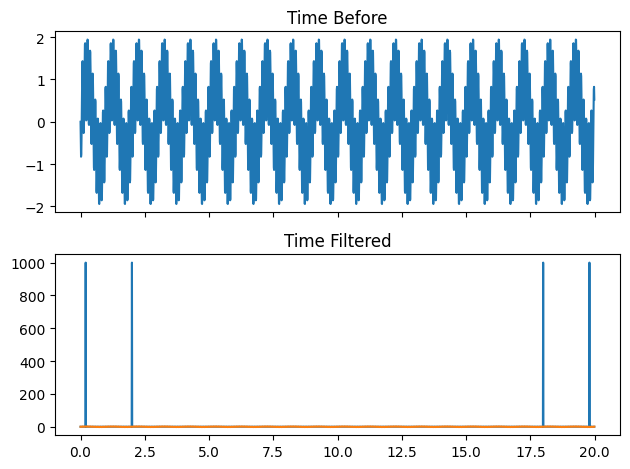

[ 1.22464680e-16 -5.24994733e-01 -8.25723283e-01 ...  7.63675202e-01
  8.25723283e-01  5.24994733e-01]


In [48]:
def fft_filter(data, min_frq, max_frq, N):
    data_fft = fft(data)
    #b, a = signal.butter(N, [min_frq, max_frq], 'band', analog = False, output = 'ba', fs = 100)
    #filtered = signal.lfilter(b, a, data_fft)
    filtered = data_fft

    fig, (ax1, ax3) = plt.subplots(2, 1, sharex=True) #Sampled at 1 kHz

    ax1.plot(time, data)
    ax1.set_title('Time Before')

    plt.plot(time, abs(filtered))
    #set_title('Frequency')

    data_ifft = ifft(filtered)

    ax3.plot(time, (data_ifft))
    ax3.set_title('Time Filtered')
    plt.tight_layout()
    plt.show()
    
    #return data_ifft

fft_filter(sinewave, 0.5, 5, 3)

print(sinewave)

In [11]:
%%timeit
def fft_filter(data, min_frq, max_frq, N):
    data_fft = fft(data)
    b, a = signal.butter(N, [min_frq, max_frq], 'band', analog = False, output = 'ba', fs = 100)
    filtered = signal.lfilter(b, a, data_fft)
    data_ifft = ifft(abs(filtered))
    return data_ifft

fft_filter(y, 0.5, 5, 4)

589 µs ± 34.5 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
